<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-1K/blob/main/Water_Quality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install lucifer-ml

     |████████████████████████████████| 67.4 MB 28 kB/s 


In [3]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy.stats import norm, boxcox
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import Counter
from scipy import stats
from tqdm import tqdm_notebook

## Importing LuciferML
from luciferml.supervised.classification import Classification
from luciferml.preprocessing import Preprocess as prep

import warnings
warnings.simplefilter(action='ignore', category=Warning)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
dataset = pd.read_csv('https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/water_potability.csv')
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
dataset.shape

(3276, 10)

In [6]:
dataset.describe().T.style.bar(
    subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.000000,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [7]:
dataset.isnull().values.any()

True

In [8]:
dataset.dropna(inplace =True)

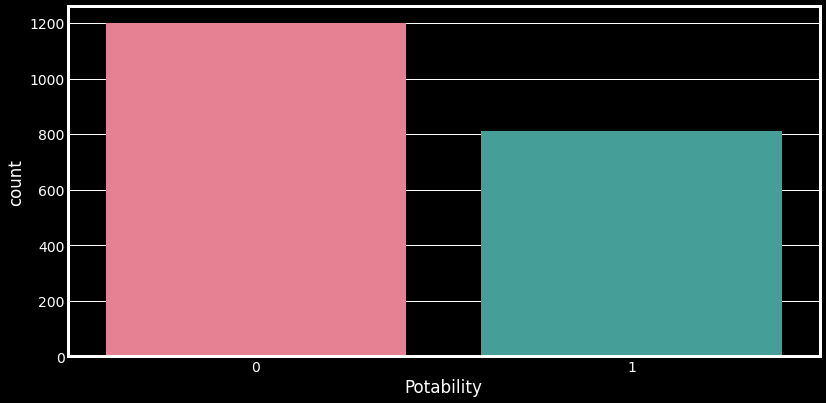

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Potability", data=dataset, palette='husl')

In [10]:
cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

Your Charts are being ready:   0%|          | 0/9 [00:00<?, ?it/s]

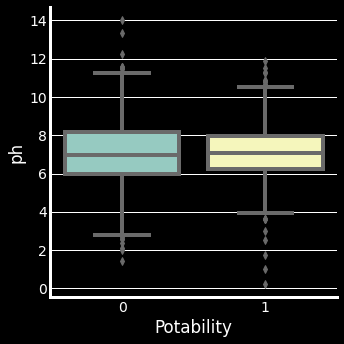

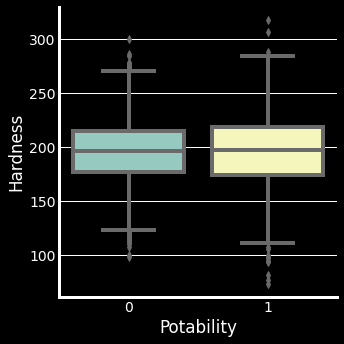

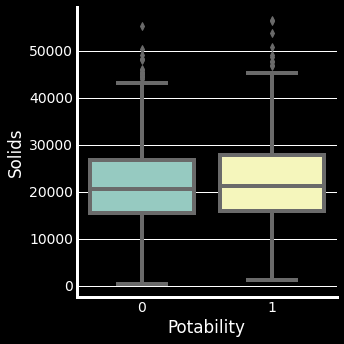

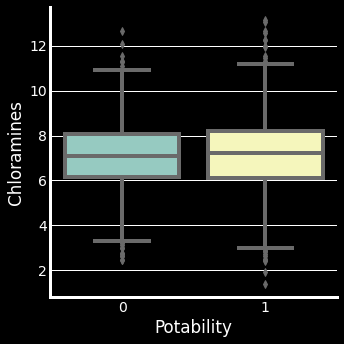

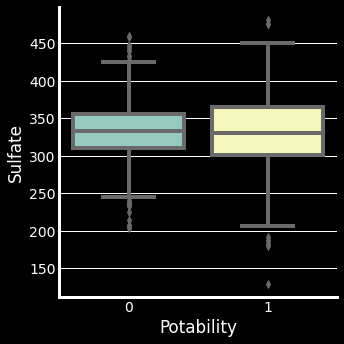

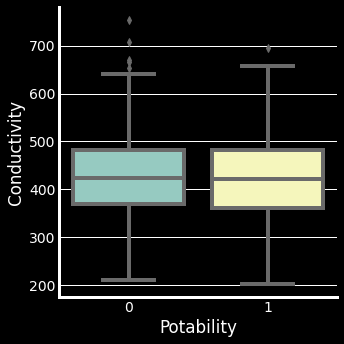

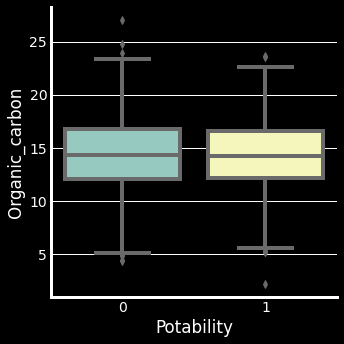

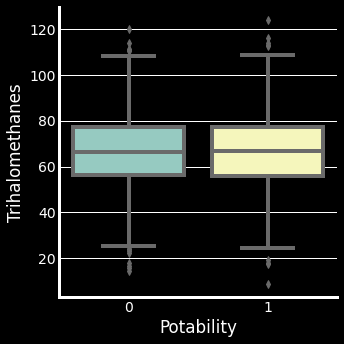

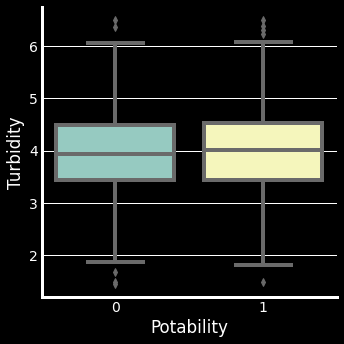

In [11]:
def boxPlotter(dataset, columnName):
    """
    Plots boxplots for column given as parameter.
    """
    sns.catplot(x="Potability", y=columnName, data=dataset, kind="box");
for column in tqdm_notebook(cols, desc = "Your Charts are being ready"):
    boxPlotter(dataset, column)

In [13]:
def pieChartPlotter(dataset, columnName):
    """
    Creates pie chart of the column given as parameter in the dataset
    """
    values = dataset[columnName].value_counts()
    labels = dataset[columnName].unique()
    pie, ax = plt.subplots(figsize=[10, 6])

    patches, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.2f%%', shadow=True, pctdistance=.5,explode=[0.06]*dataset[columnName].unique()
                                       )

    plt.legend(patches, labels, loc="best")
    plt.title(columnName, color='white', fontsize=14)
    plt.setp(texts, color='white', fontsize=20)
    plt.setp(autotexts, size=10, color='black')
    autotexts[1].set_color('black')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

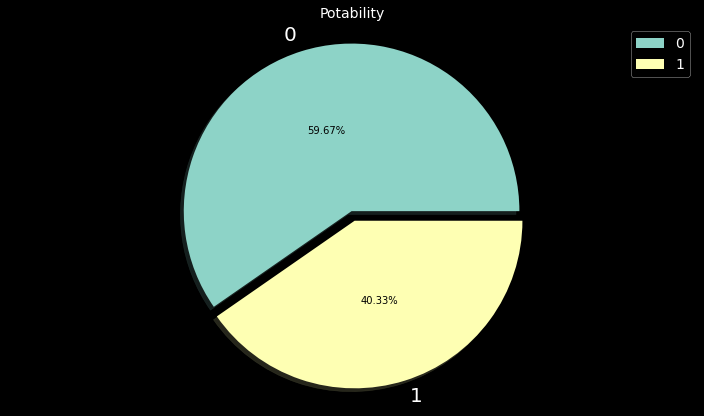

In [14]:
pieChartPlotter(dataset, 'Potability') 

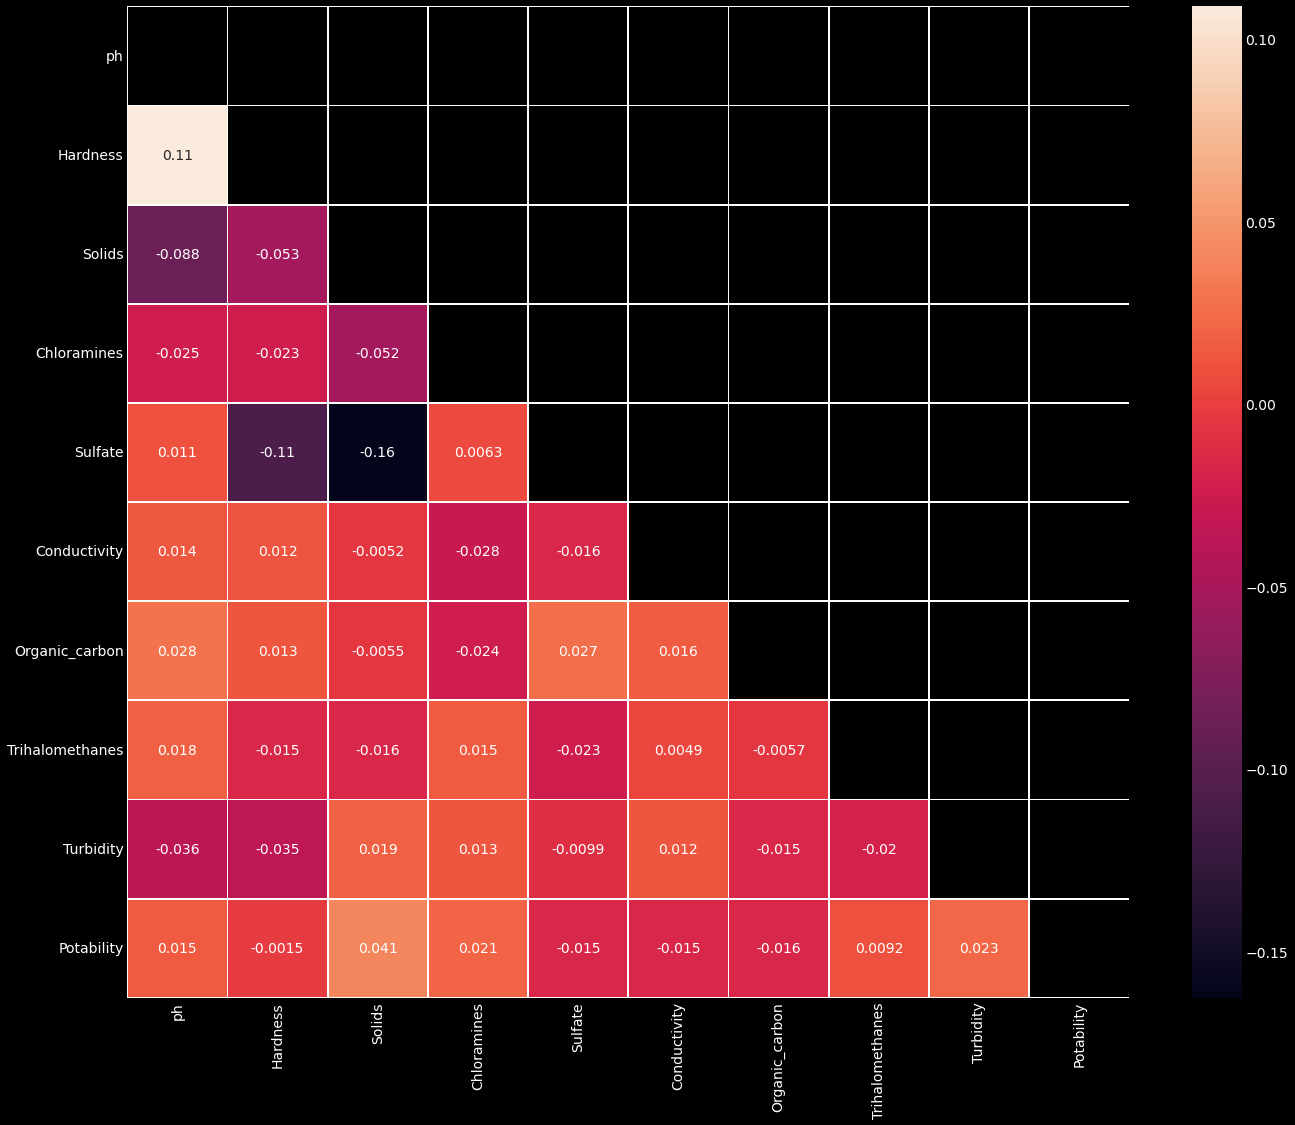

In [15]:
plt.figure(figsize=(20, 17))
matrix = np.triu(dataset.corr())
sns.heatmap(dataset.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");

In [16]:
def distributionPlot(dataset):
    """ 
    Creates distribution plot.
    """
    fig = plt.figure(figsize=(20, 20))
    for i in tqdm_notebook(range(0, len(dataset.columns)), desc = 'Your plots are being ready'):
        fig.add_subplot(np.ceil(len(dataset.columns)/3), 3, i+1)
        sns.distplot(
            dataset.iloc[:, i], color="lightcoral", rug=True)
        fig.tight_layout(pad=3.0)

Your plots are being ready:   0%|          | 0/9 [00:00<?, ?it/s]

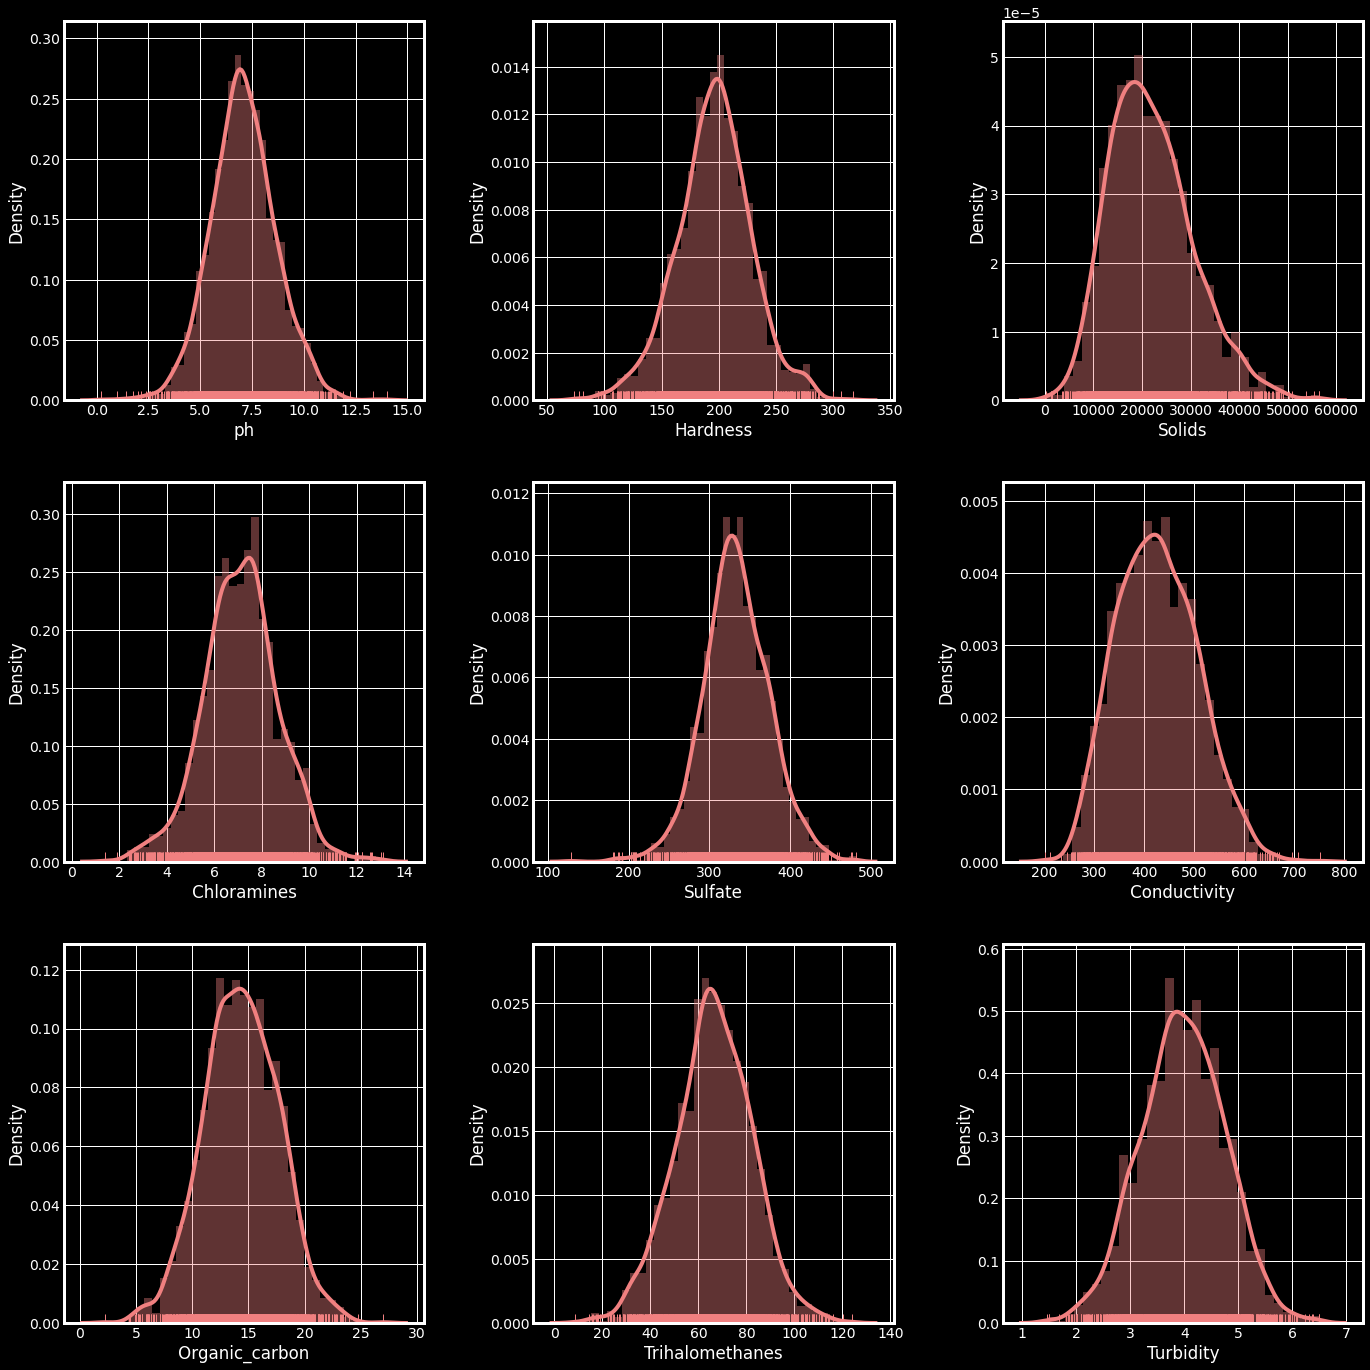

In [17]:
plot_data = dataset.drop(['Potability'], axis =1)
distributionPlot(plot_data)


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started Preprocessor 


Skewness in numerical features: 

                 Skewness
Solids           0.595449
Conductivity     0.266670
ph               0.048910
Chloramines      0.012967
Organic_carbon  -0.020003
Turbidity       -0.033027
Sulfate         -0.046523
Trihalomethanes -0.051384
Hardness        -0.085174
Skewness Before Transformation for Solids:  0.5958940107371633 

Mean before Transformation for Solids : 21917.441374490336, Standard Deviation before Transformation for Solids : 8640.090806098791 



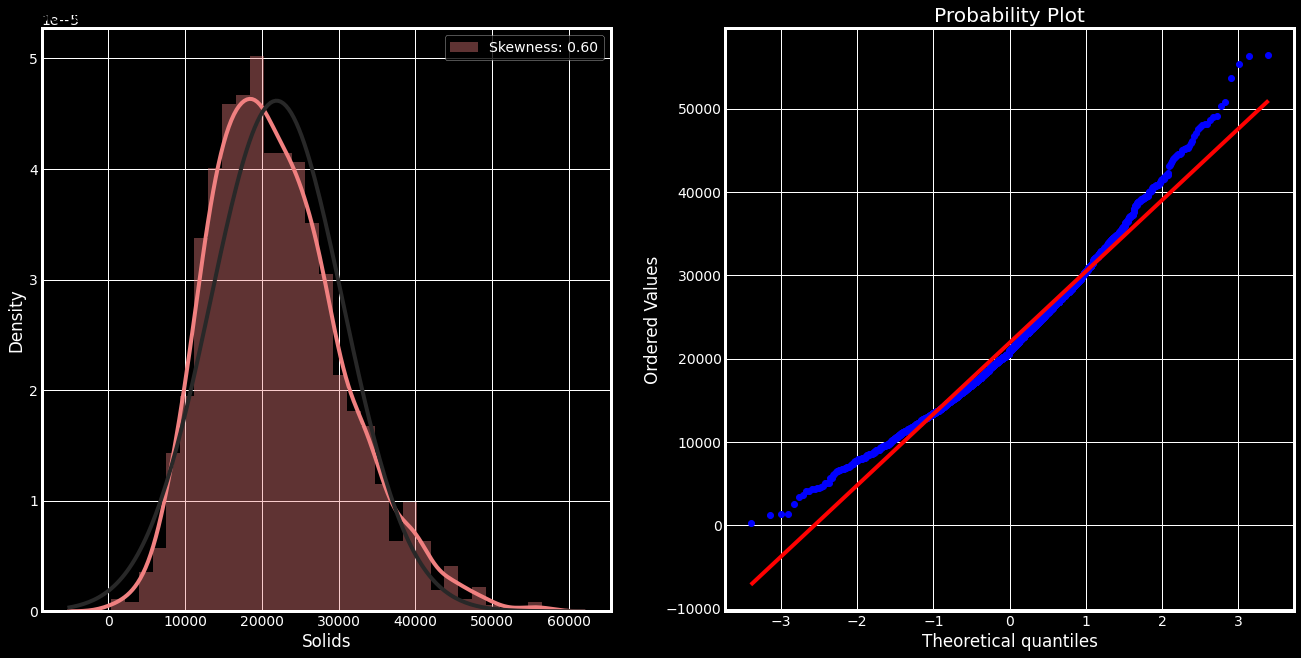

Skewness After Transformation for Solids:  -1.2308145151482406 

Mean before Transformation for Solids : 9.908982178445935, Standard Deviation before Transformation for Solids : 0.4428466687614959 



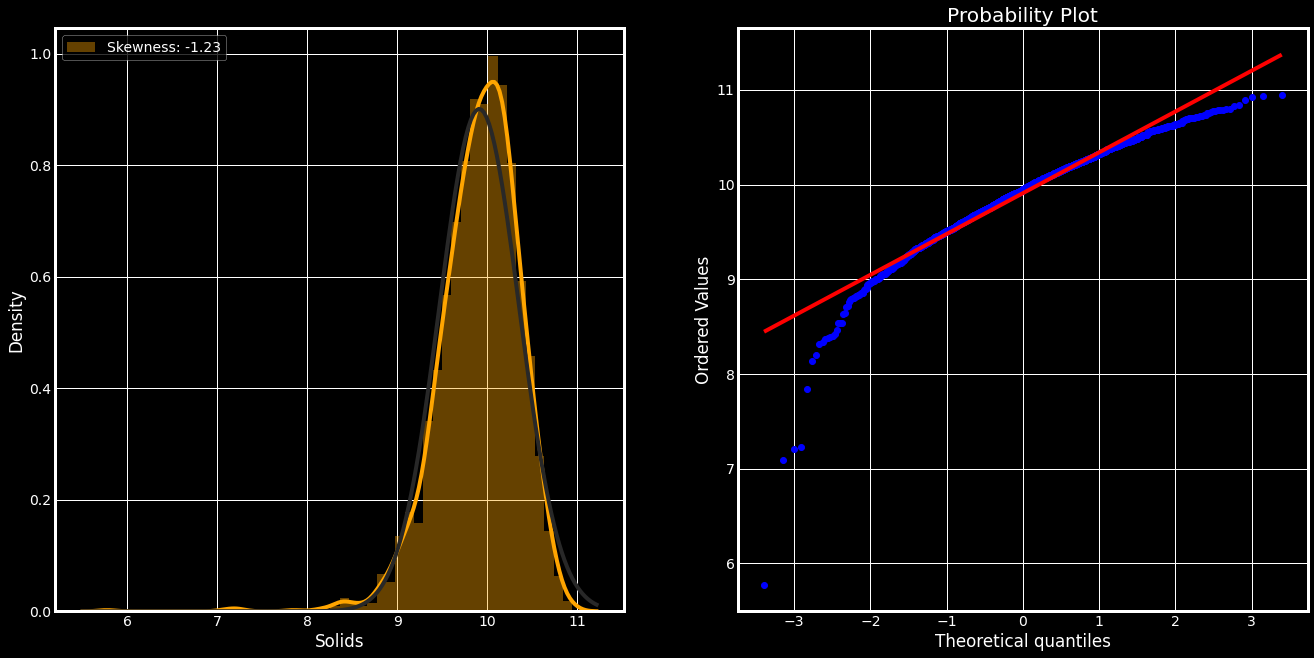

Skewness Before Transformation for Conductivity:  0.26686882669457 

Mean before Transformation for Conductivity : 426.5264087317783, Standard Deviation before Transformation for Conductivity : 80.69250214345881 



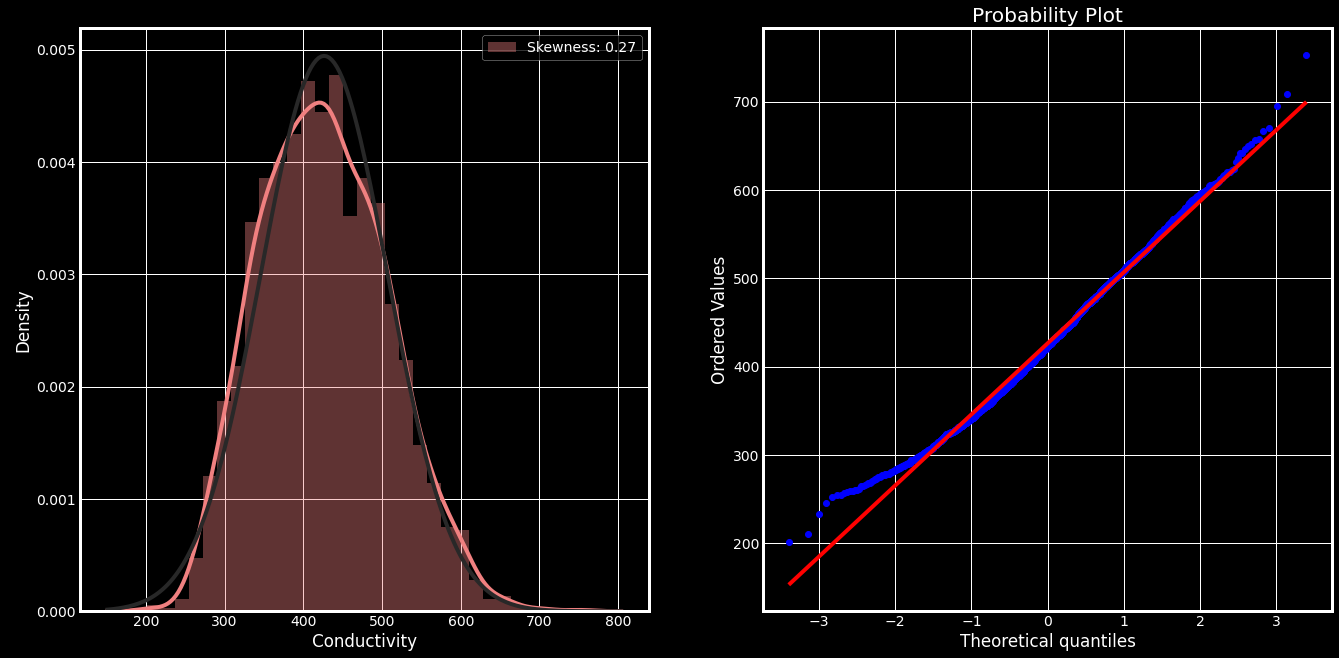

Skewness After Transformation for Conductivity:  -0.19929597288588363 

Mean before Transformation for Conductivity : 6.03995949808105, Standard Deviation before Transformation for Conductivity : 0.19133953254702343 



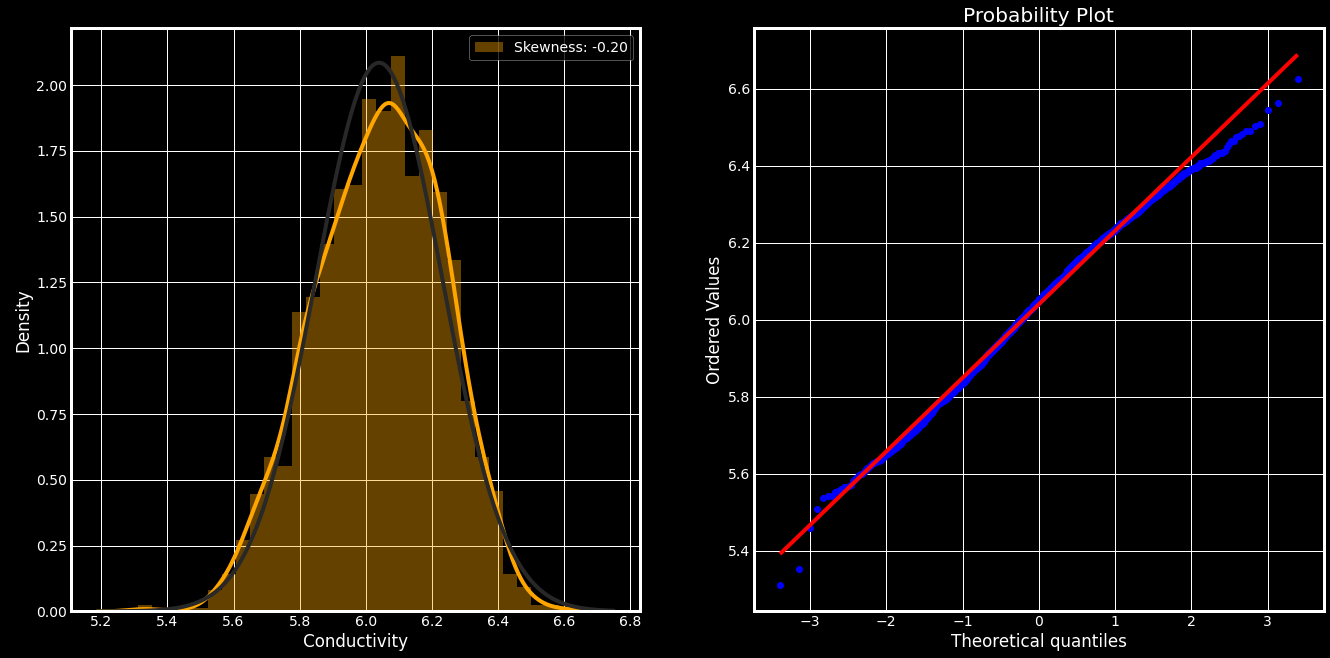

Skewness Before Transformation for ph:  0.04894678355193397 

Mean before Transformation for Ph : 7.085989839285033, Standard Deviation before Transformation for Ph : 1.572945479321659 



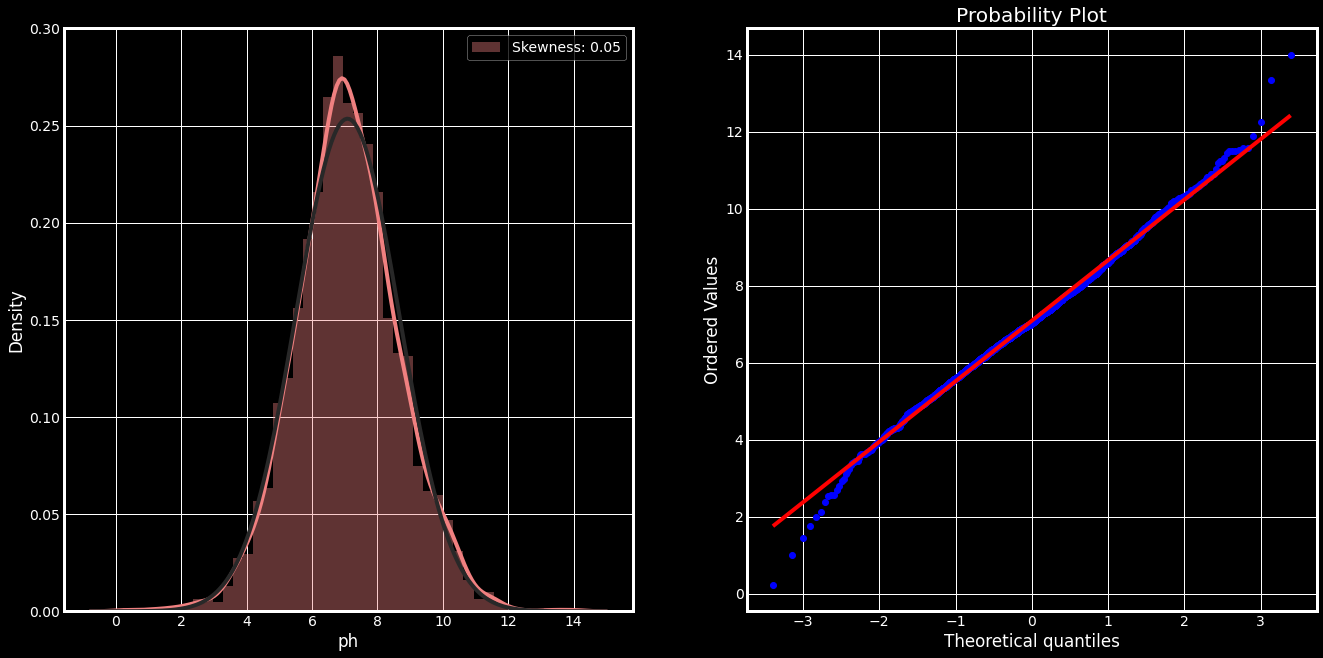

Skewness After Transformation for ph:  -1.1353215889866628 

Mean before Transformation for Ph : 2.069646135724062, Standard Deviation before Transformation for Ph : 0.2091935570875167 



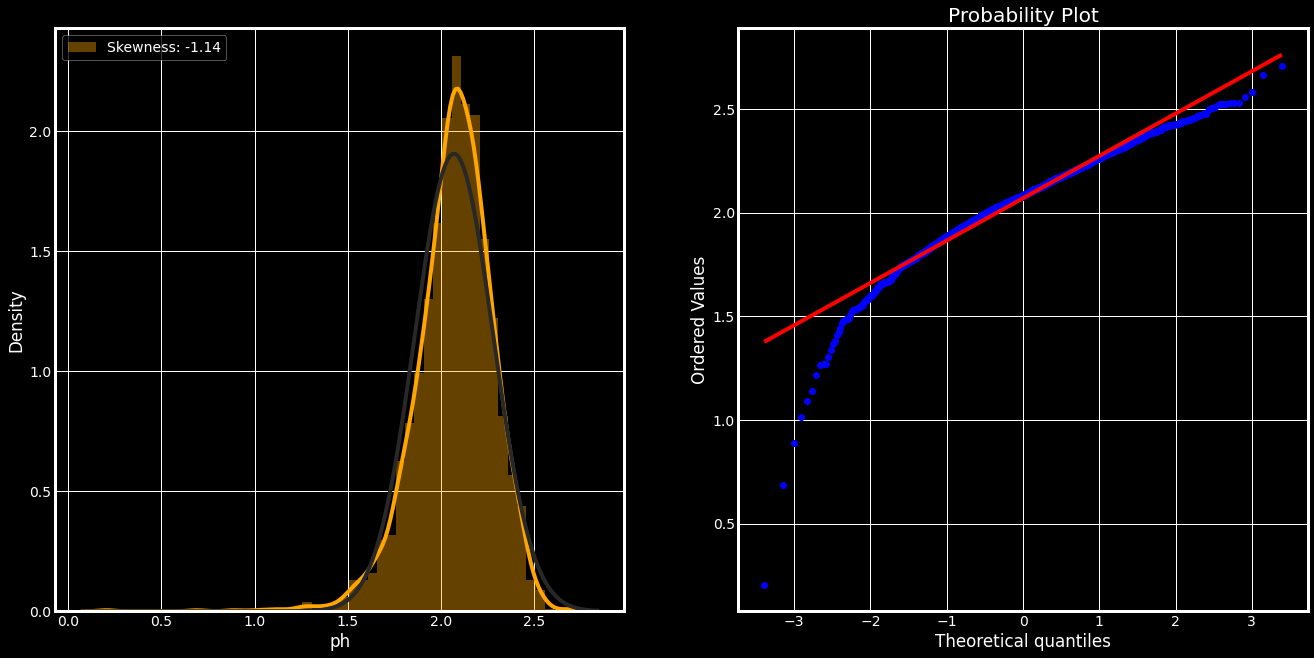

Skewness Before Transformation for Chloramines:  0.012976277458973314 

Mean before Transformation for Chloramines : 7.134338414511035, Standard Deviation before Transformation for Chloramines : 1.5844257944238938 



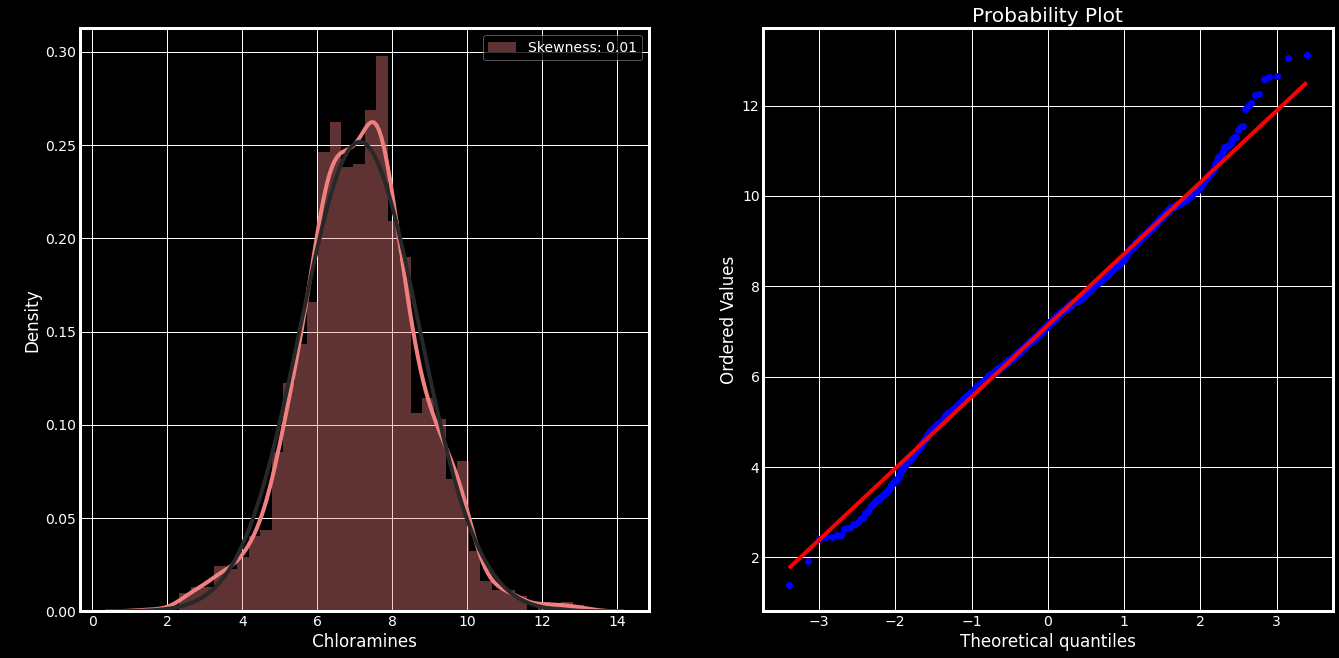

Skewness After Transformation for Chloramines:  -0.8633940049210874 

Mean before Transformation for Chloramines : 2.075660803668557, Standard Deviation before Transformation for Chloramines : 0.2077454472194916 



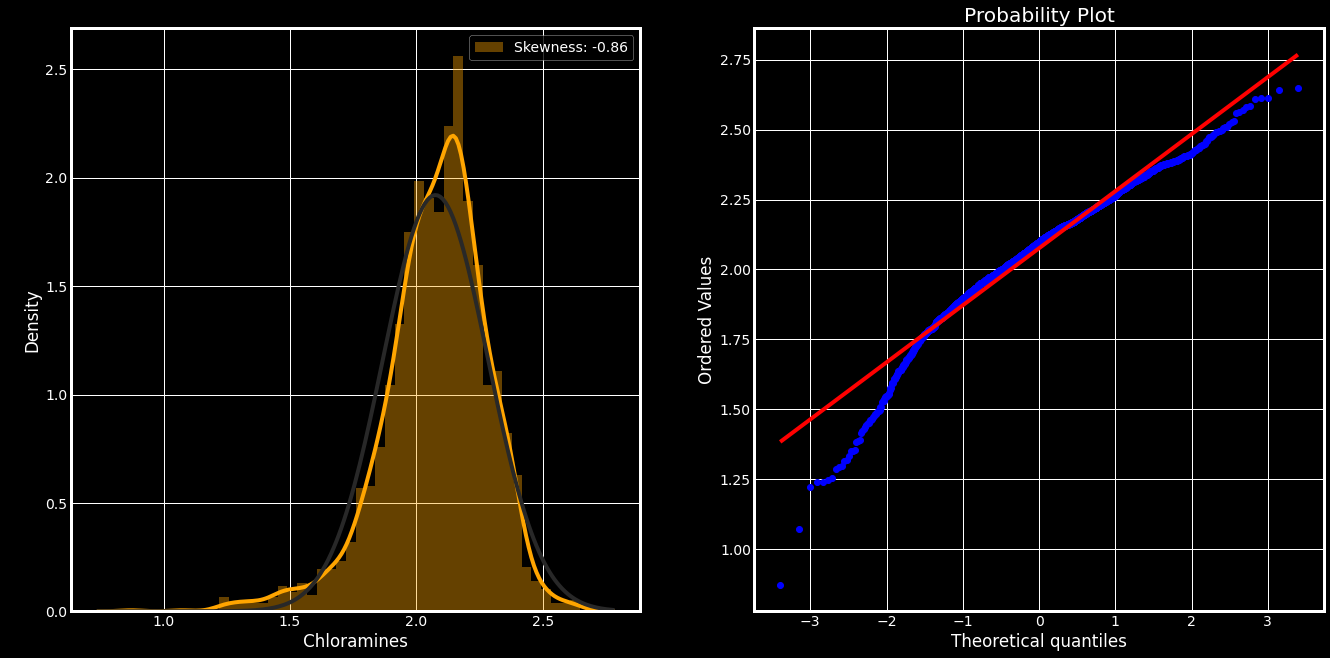

Skewness Before Transformation for Organic_carbon:  -0.020017660786145686 

Mean before Transformation for Organic_carbon : 14.357709409067539, Standard Deviation before Transformation for Organic_carbon : 3.3241318633200096 



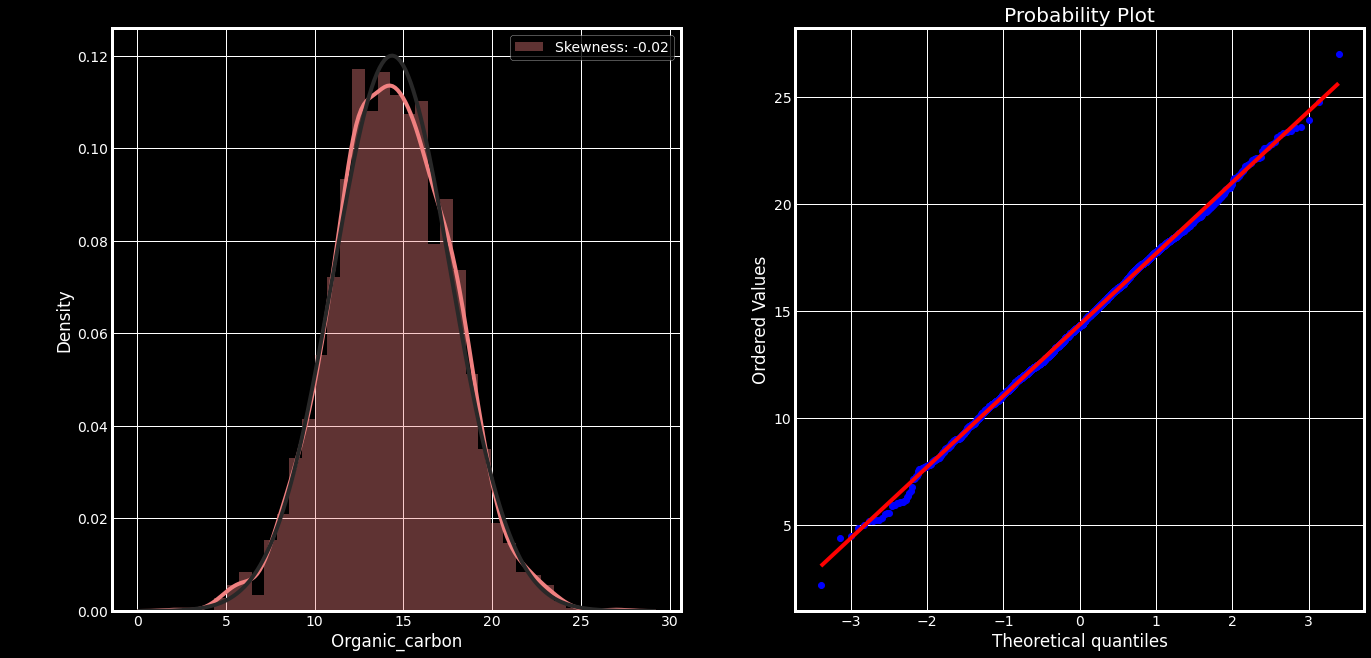

Skewness After Transformation for Organic_carbon:  -0.8735022417526354 

Mean before Transformation for Organic_carbon : 2.7060706485880073, Standard Deviation before Transformation for Organic_carbon : 0.23318171477866811 



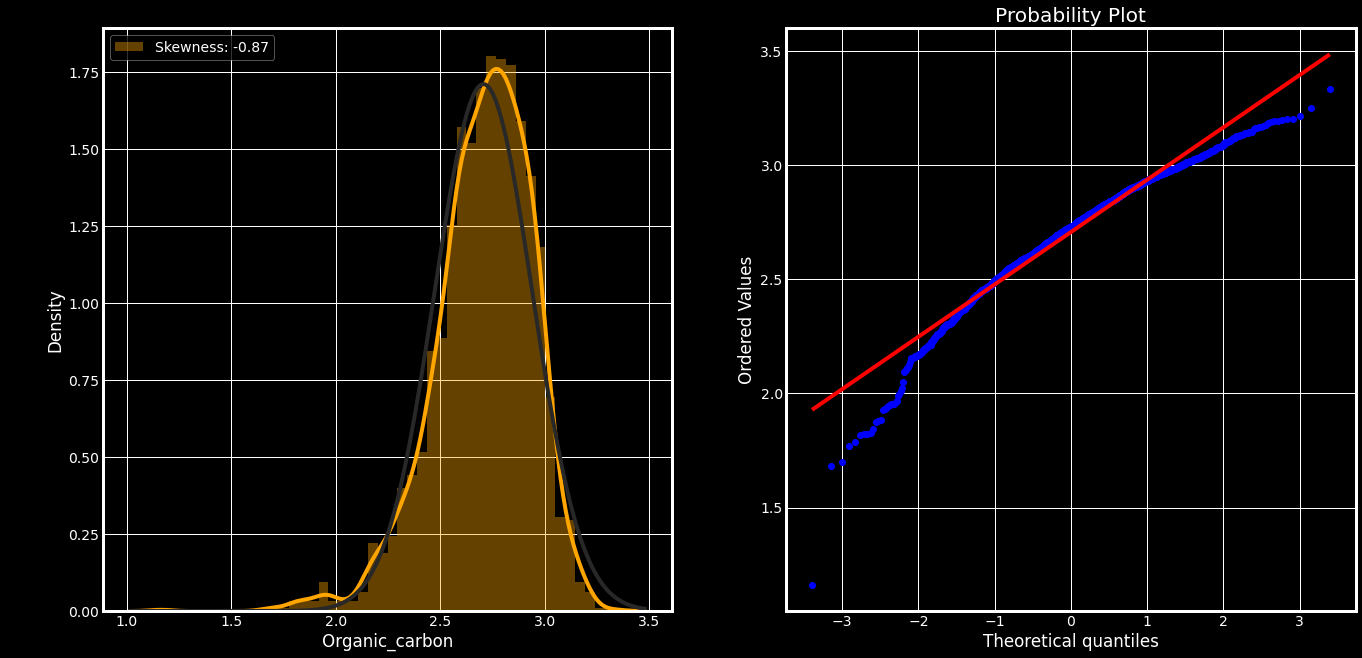

Skewness Before Transformation for Turbidity:  -0.03305148365834328 

Mean before Transformation for Turbidity : 3.9697287992523864, Standard Deviation before Transformation for Turbidity : 0.7801521151552843 



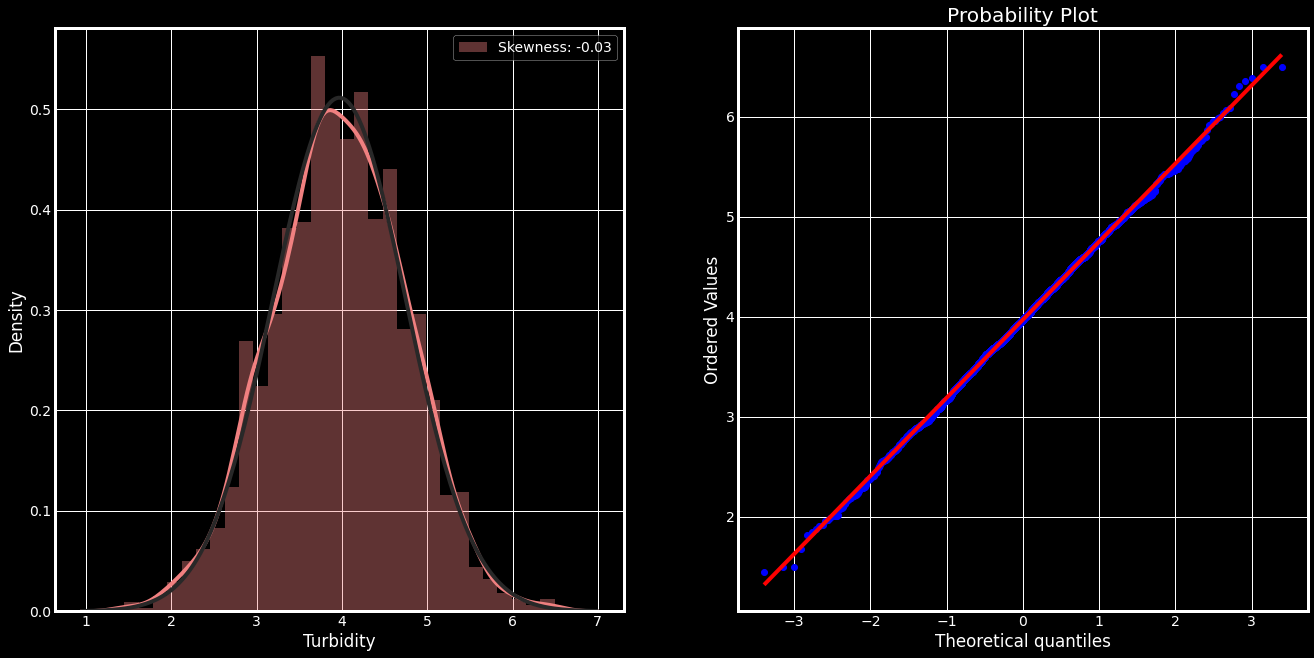

Skewness After Transformation for Turbidity:  -0.5344601027379543 

Mean before Transformation for Turbidity : 1.5905102577808692, Standard Deviation before Transformation for Turbidity : 0.16262524294524067 



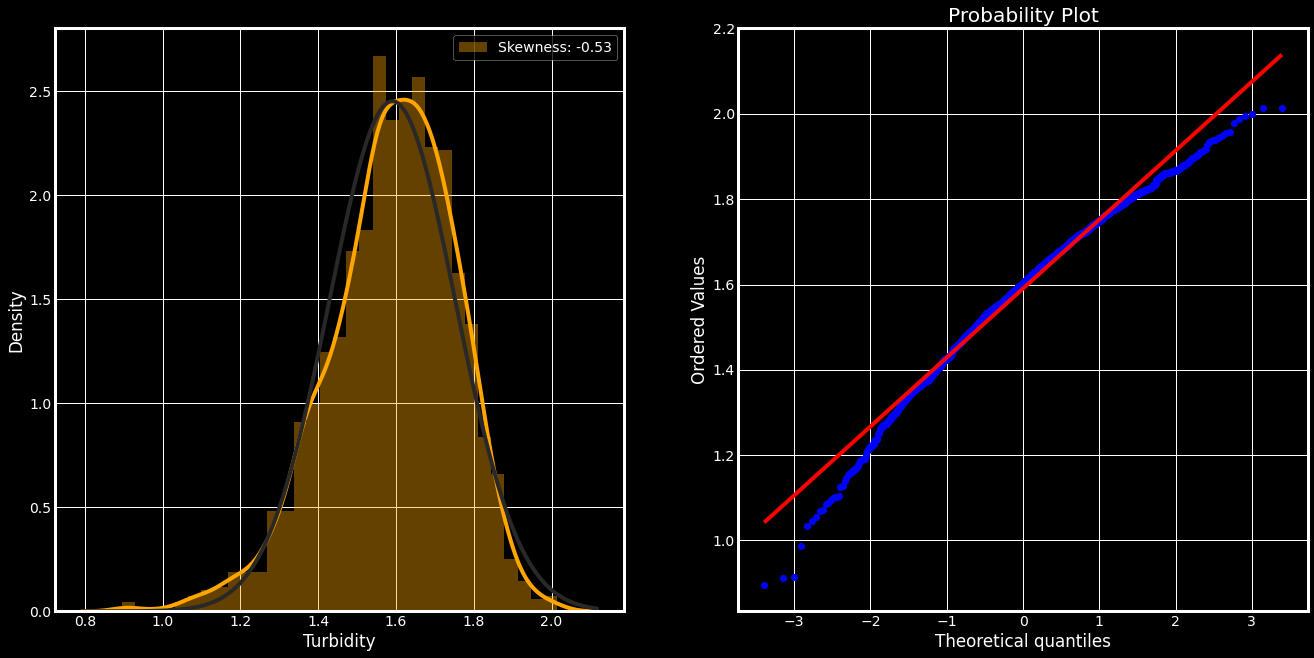

Skewness Before Transformation for Sulfate:  -0.046557696988421486 

Mean before Transformation for Sulfate : 333.22467188905864, Standard Deviation before Transformation for Sulfate : 41.194925817413676 



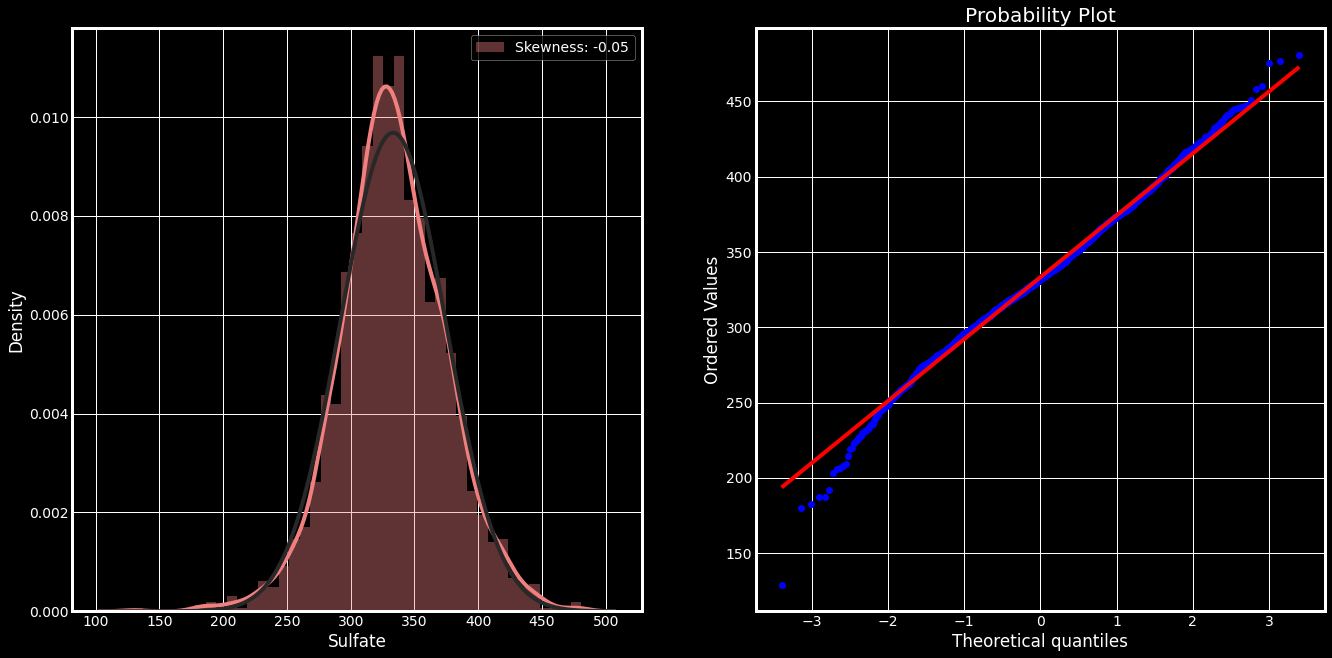

Skewness After Transformation for Sulfate:  -0.6904323262620179 

Mean before Transformation for Sulfate : 5.803934429028258, Standard Deviation before Transformation for Sulfate : 0.1272025102134412 



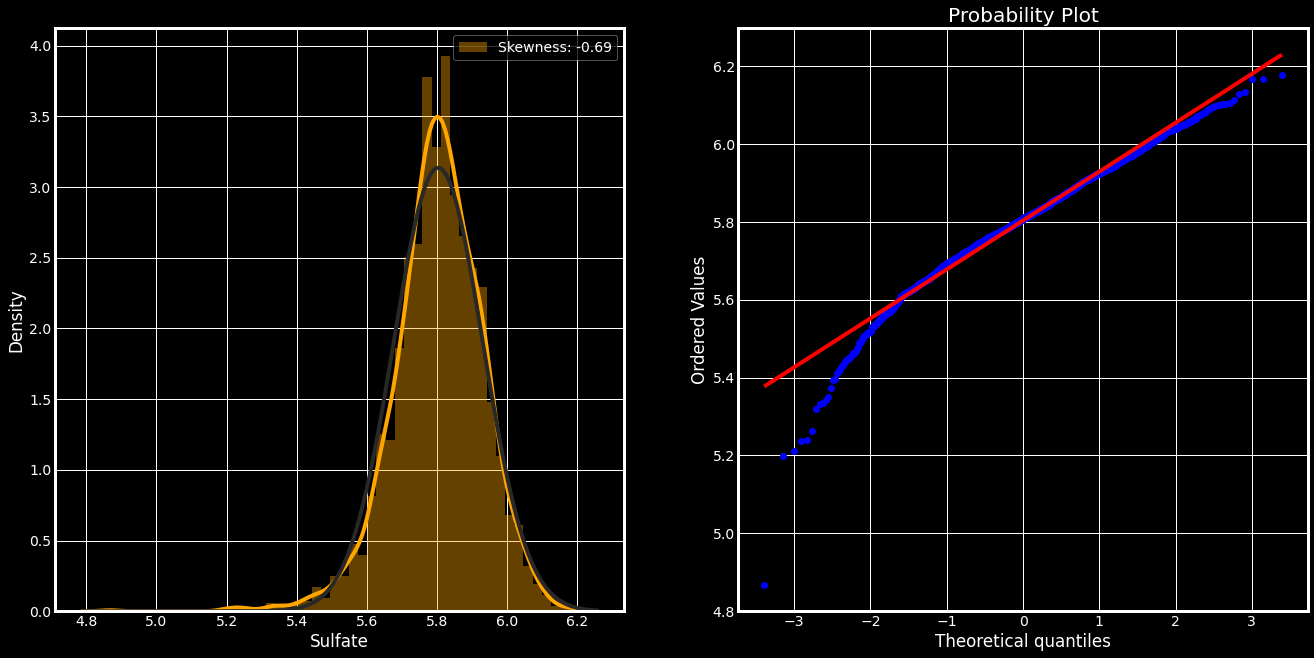

Skewness Before Transformation for Trihalomethanes:  -0.051422085759112356 

Mean before Transformation for Trihalomethanes : 66.4008593672628, Standard Deviation before Transformation for Trihalomethanes : 16.0731116931157 



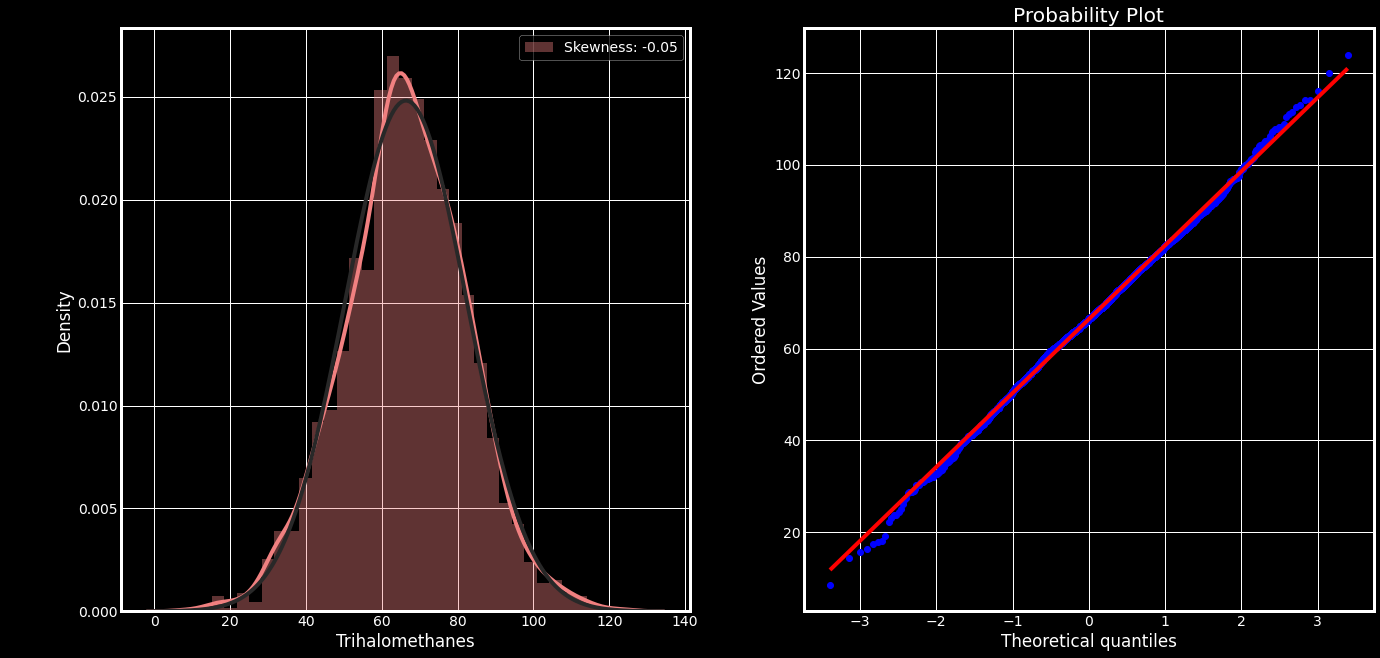

Skewness After Transformation for Trihalomethanes:  -1.1717469055146503 

Mean before Transformation for Trihalomethanes : 4.178489111806941, Standard Deviation before Transformation for Trihalomethanes : 0.265483190023941 



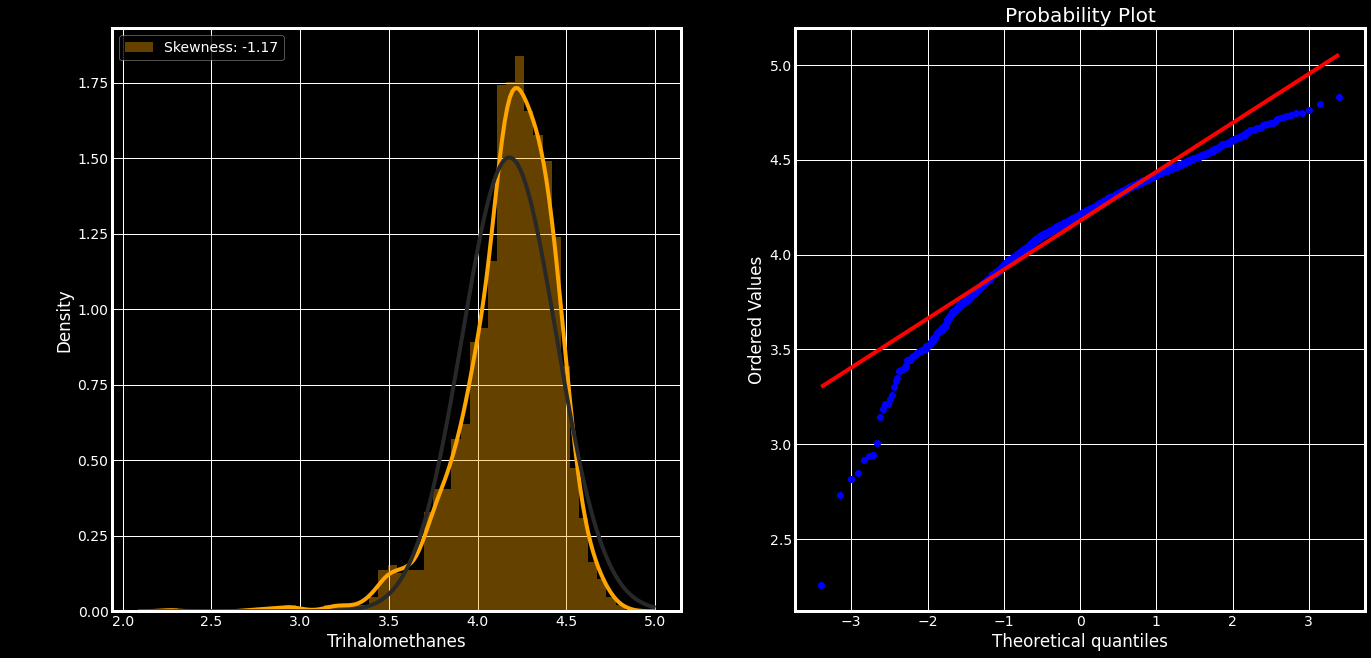

Skewness Before Transformation for Hardness:  -0.08523742258053371 

Mean before Transformation for Hardness : 195.9680715571974, Standard Deviation before Transformation for Hardness : 32.62696937081507 



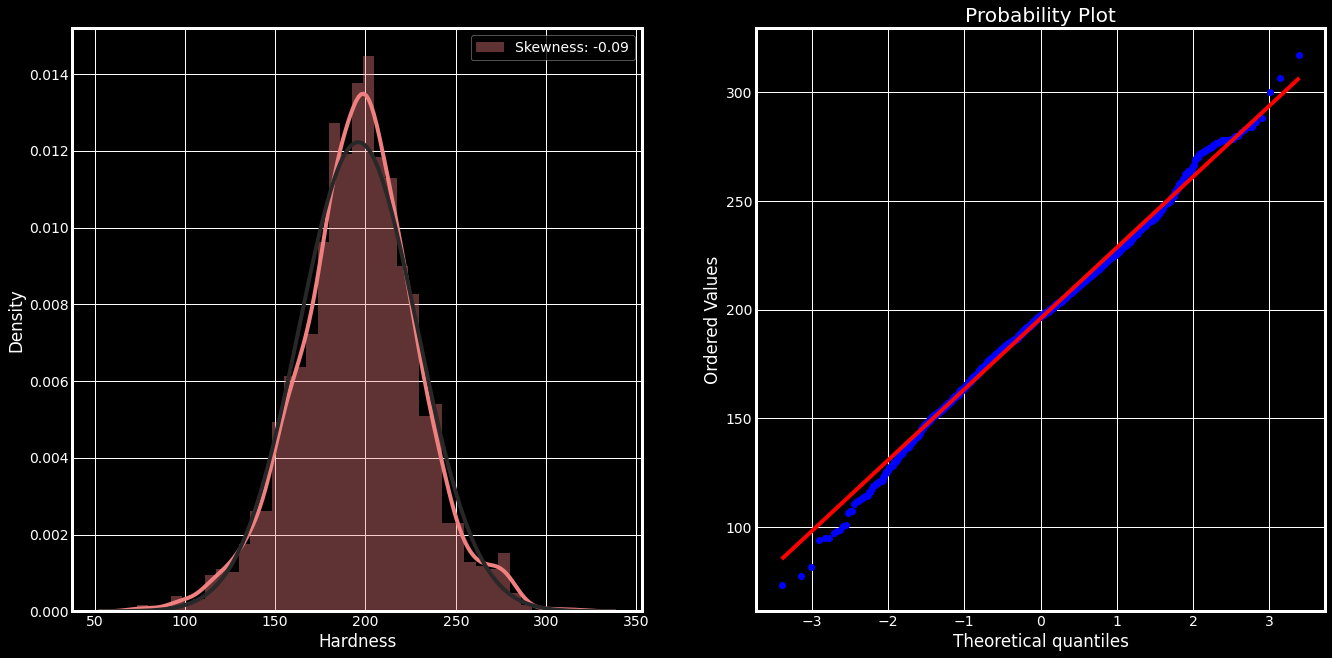

Skewness After Transformation for Hardness:  -0.8204384680215894 

Mean before Transformation for Hardness : 5.268413889542584, Standard Deviation before Transformation for Hardness : 0.17487336609382453 



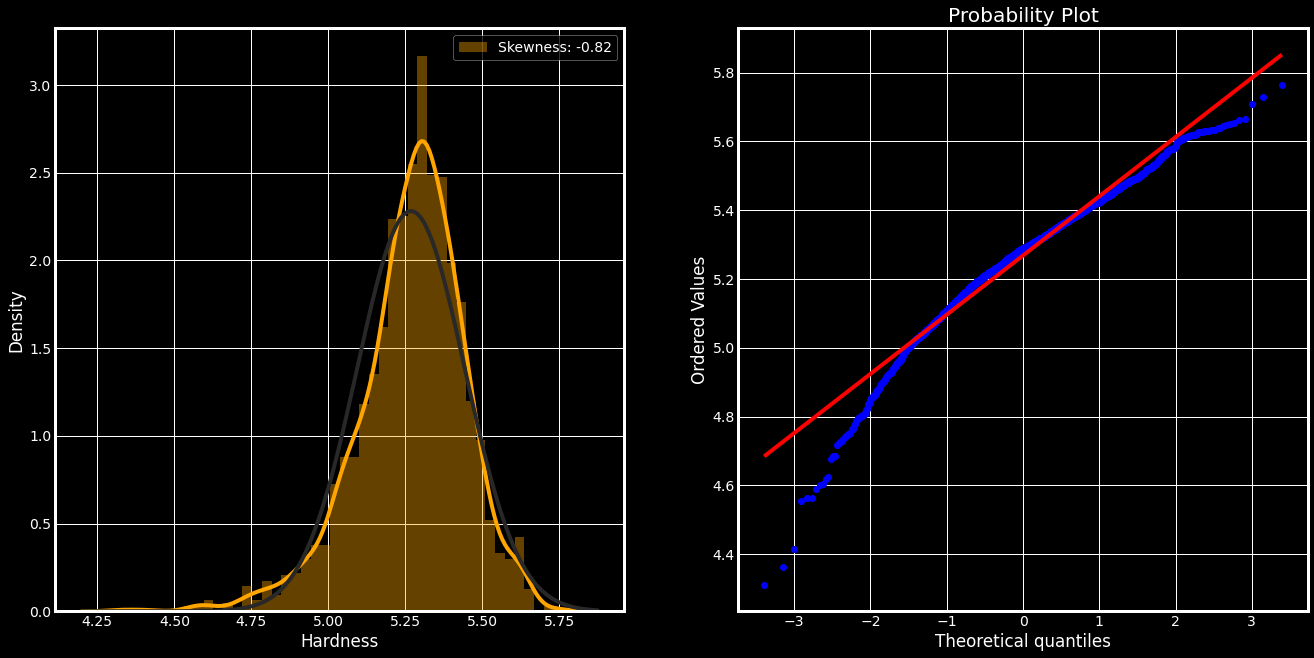

Elapsed Time:  10.914987325668335 seconds



In [18]:
 dataset = prep.skewcorrect(dataset,except_columns=['Potability'])

In [19]:
features = dataset.iloc[:, :-1]
labels = dataset.iloc[:, -1]

In [20]:
features , labels

(            ph  Hardness     Solids  ...  Organic_carbon  Trihalomethanes  Turbidity
 3     2.231816  5.372373   9.999680  ...        2.967154         4.618498   1.727891
 4     2.311765  5.204564   9.797015  ...        2.530380         3.496447   1.624341
 5     1.884656  5.243403  10.266382  ...        2.240681         4.023884   1.269679
 6     2.418042  5.517741  10.266418  ...        2.693931         4.449727   1.301006
 7     2.265490  5.319891   9.523185  ...        2.592551         4.155727   1.686663
 ...        ...       ...        ...  ...             ...              ...        ...
 3267  2.301575  5.375498   9.675483  ...        2.388682         4.026588   1.725235
 3268  2.041551  5.339081   9.755447  ...        2.845915         3.397143   1.491326
 3269  2.525009  4.562394  10.523791  ...        2.843324         3.750880   1.680691
 3270  1.955806  5.234627  10.171214  ...        2.570137         4.117734   1.541097
 3271  1.734854  5.271366  10.770210  ...        2.700

In [21]:
features.shape, labels.shape

((2011, 9), (2011,))

In [22]:
accuracy_scores =  {}


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Logistic Regression on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Maki

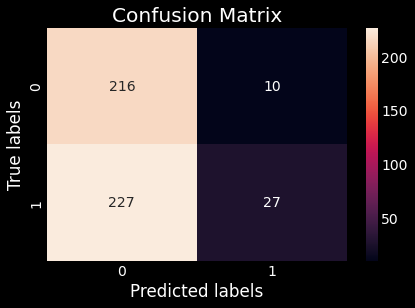

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.50625
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 52.86 %
Standard Deviation: 0.97 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  0.3814980983734131 seconds 



In [23]:
params = {'C': 0.00026366508987303583, 'penalty': 'l2', 'solver': 'newton-cg'}

classifier =  Classification(predictor = 'lr',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Stochastic Gradient Descent on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓

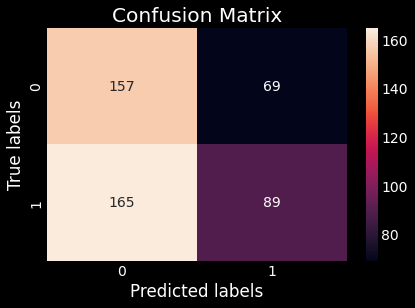

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.5125
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 54.79 %
Standard Deviation: 4.77 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  0.3575007915496826 seconds 



In [24]:
params = {'alpha': 0.01, 'l1_ratio': 1.0, 'loss': 'hinge', 'penalty': 'l1'}

classifier =  Classification(predictor = 'sgd',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Passive Aggressive on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Makin

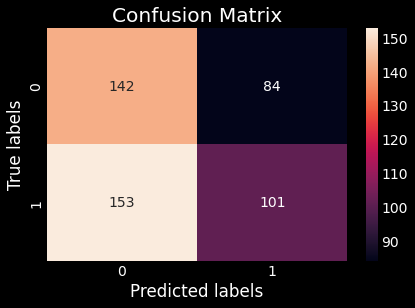

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.50625
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 53.23 %
Standard Deviation: 3.45 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  0.29334259033203125 seconds 



In [27]:
params = {'C': 0.0018329807108324356, 'loss': 'hinge', 'validation_fraction': 0.5}

classifier =  Classification(predictor = 'pass',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Ridge Classifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making 

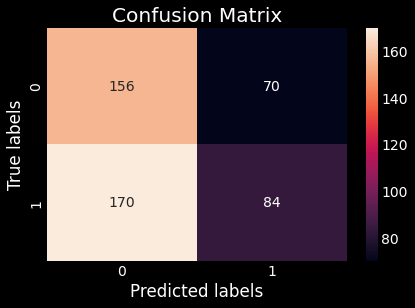

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.5
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 53.65 %
Standard Deviation: 2.08 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  0.3394775390625 seconds 



In [28]:
params = {'alpha': 3792.690190732246}

classifier =  Classification(predictor = 'ridg',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Support Vector Machine on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

M

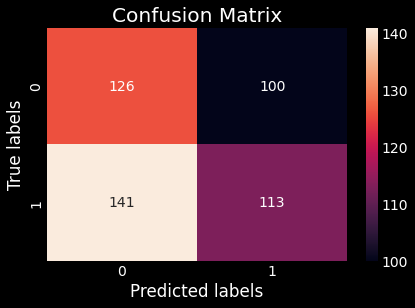

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.4979166666666667
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 52.24 %
Standard Deviation: 3.42 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  1.5875179767608643 seconds 



In [29]:
params = {'C': .75, 'gamma': 0.2,
          'kernel': 'linear', 'random_state': 42}
classifier =  Classification(predictor = 'svm',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training K-Nearest Neighbours on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Mak

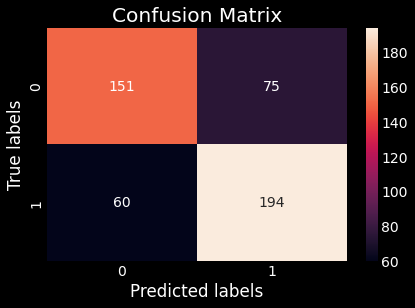

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.71875
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 73.23 %
Standard Deviation: 3.72 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  0.4574909210205078 seconds 



In [30]:
params = {'algorithm': 'kd_tree', 'n_jobs': 1, 'n_neighbors': 1, 'weights': 'uniform'}
classifier =  Classification(predictor = 'knn',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Decision Tree Classifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]


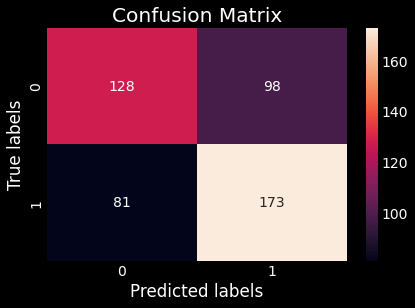

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.6270833333333333
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 62.86 %
Standard Deviation: 2.94 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  0.49431395530700684 seconds 



In [31]:
params = {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'splitter': 'best', 'random_state': 42}
classifier =  Classification(predictor = 'dt',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Naive Bayes Classifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

M

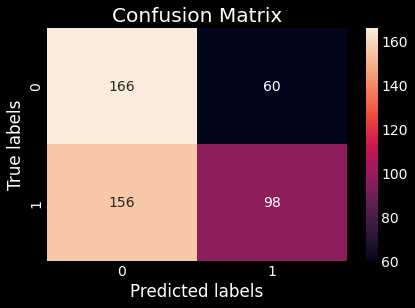

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.55
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 56.25 %
Standard Deviation: 2.59 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  0.28757500648498535 seconds 



In [32]:

classifier =  Classification(predictor = 'nb', smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Random Forest Classifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]


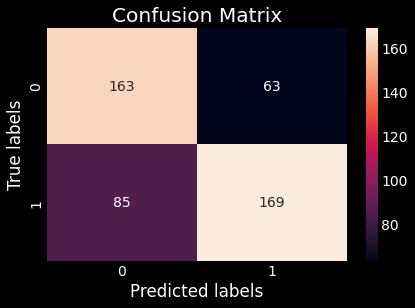

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.6916666666666667
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 73.59 %
Standard Deviation: 1.92 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  10.738067865371704 seconds 



In [33]:

params = {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 150,'random_state':0}
classifier =  Classification(predictor = 'rfc',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Gradient Boosting Classifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ 

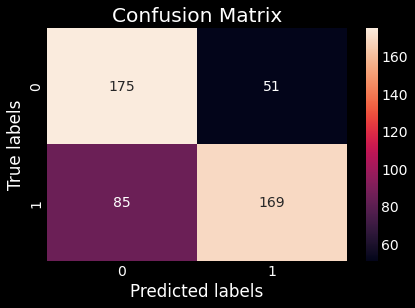

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.7166666666666667
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 75.99 %
Standard Deviation: 1.90 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  70.46223163604736 seconds 



In [34]:
params = {'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 70, 'max_features': 2, 'n_estimators': 300}

classifier =  Classification(predictor = 'gbc',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training AdaBoost Classifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Maki

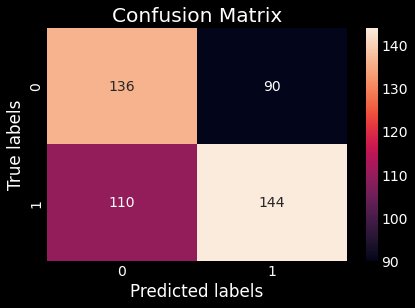

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.5833333333333334
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 57.76 %
Standard Deviation: 2.11 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  14.61914587020874 seconds 



In [35]:
params = {'learning_rate': 0.1, 'n_estimators': 300}

classifier =  Classification(predictor = 'ada',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Bagging Classifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Makin

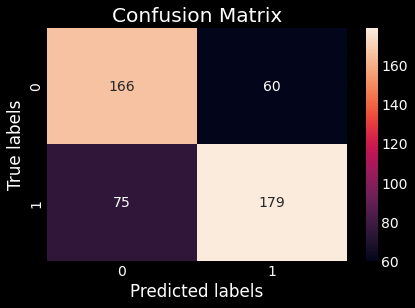

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.71875
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 73.33 %
Standard Deviation: 2.53 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  20.850318431854248 seconds 



In [36]:
params = {'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 200}

classifier =  Classification(predictor = 'bag',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Extra Trees Classifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

M

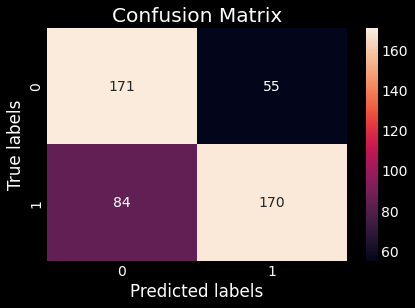

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.7104166666666667
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 74.32 %
Standard Deviation: 2.79 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  25.005793809890747 seconds 



In [37]:
params = {'criterion': 'gini', 'max_depth': 40, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}

classifier =  Classification(predictor = 'extc',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training LightGBM on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusio

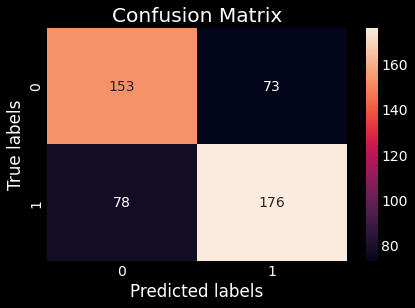

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.6854166666666667
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 72.29 %
Standard Deviation: 3.11 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  11.032544374465942 seconds 



In [38]:
params = {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 1000, 'num_leaves': 16}

classifier =  Classification(predictor = 'lgbm',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training CatBoostClassifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Makin

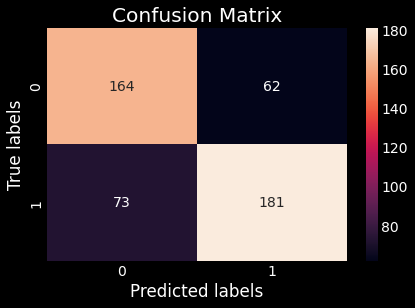

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.71875
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 73.65 %
Standard Deviation: 2.87 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  62.00363206863403 seconds 



In [39]:
params = {'max_depth': 10, 'n_estimators': 200}

classifier =  Classification(predictor = 'cat',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training XGBClassifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Con

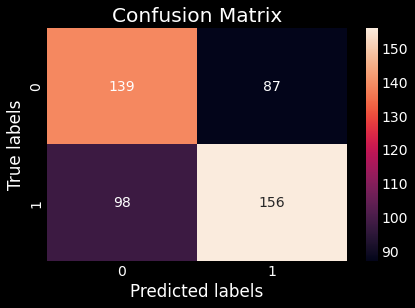

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.6145833333333334
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 63.59 %
Standard Deviation: 2.89 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  9.358154773712158 seconds 



In [40]:
params = {'learning_rate':0.02, 'n_estimators':600, 'objective':'binary:logistic', 'eval_metric':'logloss', 'nthread':-1}
classifier =  Classification(predictor = 'xgb',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training ANN on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Mat

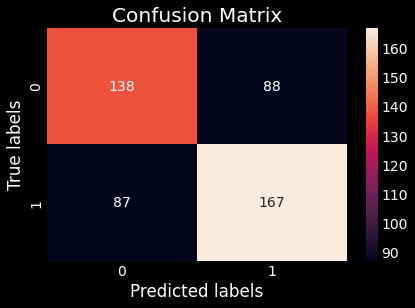

Streaming output truncated to the last 5000 lines.
Epoch 205/300
70/70 [==============================] - 0s 2ms/step - loss: 0.3031 - accuracy: 0.8733
Epoch 206/300
70/70 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.8756
Epoch 207/300
70/70 [==============================] - 0s 2ms/step - loss: 0.2954 - accuracy: 0.8785
Epoch 208/300
70/70 [==============================] - 0s 2ms/step - loss: 0.3027 - accuracy: 0.8709
Epoch 209/300
70/70 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.8773
Epoch 210/300
70/70 [==============================] - 0s 2ms/step - loss: 0.2965 - accuracy: 0.8767
Epoch 211/300
70/70 [==============================] - 0s 2ms/step - loss: 0.3016 - accuracy: 0.8767
Epoch 212/300
70/70 [==============================] - 0s 2ms/step - loss: 0.2923 - accuracy: 0.8796
Epoch 213/300
70/70 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.8594
Epoch 214/300
70/70 [===================

In [41]:
classifier =  Classification(predictor = 'ann',params=params, batch_size = 25, input_units = 15, epochs = 300, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']

In [42]:
maxKey = max(accuracy_scores, key=lambda x: accuracy_scores[x])
print('The model with highest K-Fold Validation Accuracy score is  {0} with an accuracy of  {1:.2f}'.format(
    maxKey, accuracy_scores[maxKey]))

The model with highest K-Fold Validation Accuracy score is  Gradient Boosting Classifier with an accuracy of  75.99


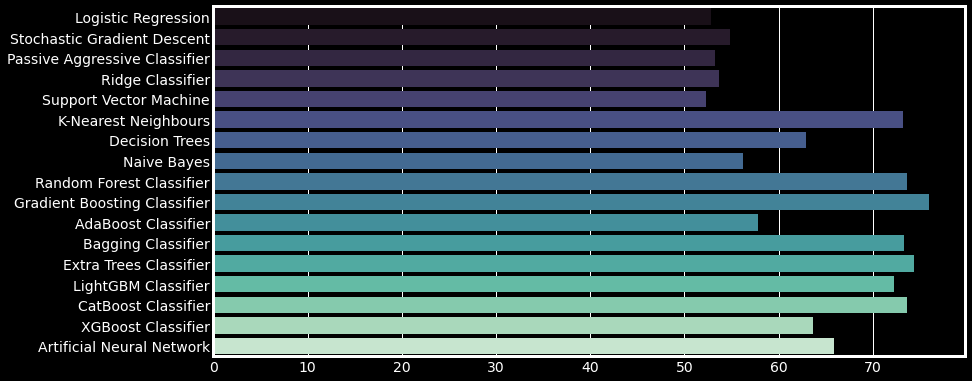

In [43]:
plt.figure(figsize=(12, 6))
model_accuracies = list(accuracy_scores.values())
model_names = list(accuracy_scores.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='mako')